## Quantium Customer segmentation 
Using Recency Frequency and Monetary (RFM) analysis to understand customers behaviour

This project is aimed at better understanding the types of customers who purchase chips and their purchasing behaviour within the region and provide recommendations for commercial application. Two sets of data were provided for this analysis and they are transaction dataset and purchase behaviour dataset of customers. The features of the dataset are listd below

#### Transaction
* date - date of transaction
* store_nbr - the store number in which a transaction was carried out
* lylty_card_nbr - number assigned to customers by the business management 
* tnx_id - tax id number
* prod_nbr - number assigned to a product
* prod_name - name of the product
* prod_qty quantity of products sold per day
* tot_sale - total sales per day

#### Purchase Behaviour
* lylty_card_nbr - number assigned to customers by the business management
* lifestage - identifies a customers family status and whether they are senior citizens or not
* premium_customer - customers purhaing power


In [1]:
#Importing the required packages for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading both datasets into pandas 
trans = pd.read_excel('QVI_transaction_data.xlsx')
purchase = pd.read_csv('QVI_purchase_behaviour.csv')

In [3]:
#Displaying the first  rows or observations
trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
#converting all column names from upper to lower case
trans.columns = map(str.lower, trans.columns)
trans.columns

Index(['date', 'store_nbr', 'lylty_card_nbr', 'txn_id', 'prod_nbr',
       'prod_name', 'prod_qty', 'tot_sales'],
      dtype='object')

In [5]:
# stripping the size from the prod_name column and creating a new column with the prod_size in grams
trans['prod_size "g"'] = trans['prod_name'].str.strip(r'\d+')
trans['prod_size "g"'].replace(r'[A-Za-z\D+]', '', regex=True, inplace=True)
trans['prod_name'].replace(r'\d+\w', '', regex=True, inplace=True)
trans['prod_name'] = trans['prod_name'].str.strip()
trans.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,"prod_size ""g"""
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150


In [6]:
# Reodering the columns
trans = trans[['date', 'store_nbr', 'lylty_card_nbr', 'txn_id', 'prod_nbr', 'prod_name', 'prod_size "g"', 'prod_qty', 
               'tot_sales']]

In [7]:
#Checking for duplicates
trans[trans[['date', 'store_nbr', 'lylty_card_nbr', 'txn_id', 'prod_nbr', 'prod_name', 'prod_size "g"', 'prod_qty', 
               'tot_sales']].duplicated() == True]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken,175,2,6.0


In [8]:
trans[trans.duplicated(keep=False)]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken,175,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken,175,2,6.0


In [9]:
trans.drop_duplicates(keep=False, inplace=True)

In [10]:
trans[trans.duplicated(keep=False)]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales


In [11]:
#Checking if there are null values in the trans dataset
trans.isnull().sum()

date              0
store_nbr         0
lylty_card_nbr    0
txn_id            0
prod_nbr          0
prod_name         0
prod_size "g"     0
prod_qty          0
tot_sales         0
dtype: int64

In [12]:
#Displaying the first 5 records of the purchase dataset
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [13]:
#Converting column names from upper to lower case in purchase dataset
purchase.columns = map(str.lower, purchase.columns)
purchase.columns

Index(['lylty_card_nbr', 'lifestage', 'premium_customer'], dtype='object')

In [14]:
#Checking for null values in the purchase dataset
purchase.isnull().sum()

lylty_card_nbr      0
lifestage           0
premium_customer    0
dtype: int64

In [15]:
#Combining transaction and purchase behaviour datasets and dispaying their shapes
comb = pd.merge(trans, purchase, on='lylty_card_nbr')
print(purchase.shape)
print(trans.shape)
print(comb.shape)

(72637, 3)
(264834, 9)
(264834, 11)


Combining the transaction and purchasing datsets on the 'lylty_card_nbr' as this is the column that is common to both datasets. The combined dataset is has thesame number of columns as the dataset with the most observation indicating that no new column was added in the course of the combination or merging. From the merger performed every purchased observaion was mapped to their respective transaction observation based on the 'lylty_card_nbr' column. 

In [16]:
comb.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales,lifestage,premium_customer
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,175,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,175,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,160,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,175,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,170,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [17]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              264834 non-null  datetime64[ns]
 1   store_nbr         264834 non-null  int64         
 2   lylty_card_nbr    264834 non-null  int64         
 3   txn_id            264834 non-null  int64         
 4   prod_nbr          264834 non-null  int64         
 5   prod_name         264834 non-null  object        
 6   prod_size "g"     264834 non-null  object        
 7   prod_qty          264834 non-null  int64         
 8   tot_sales         264834 non-null  float64       
 9   lifestage         264834 non-null  object        
 10  premium_customer  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 24.2+ MB


The combined dataset has a total of 11 features comprising of 1 datetime, 1 float, 5 int and 4 objects data types. All features has a total of 264834 entries. The data in one of the derived features 'prod_size "g"' is of data type string even though they are numbers. They will need to be converted to int data type.

In [18]:
#Converting 'prod_size "g"' to int data type
comb['prod_size "g"'] = pd.to_numeric(comb['prod_size "g"'], errors='coerce').astype('int64')

In [19]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              264834 non-null  datetime64[ns]
 1   store_nbr         264834 non-null  int64         
 2   lylty_card_nbr    264834 non-null  int64         
 3   txn_id            264834 non-null  int64         
 4   prod_nbr          264834 non-null  int64         
 5   prod_name         264834 non-null  object        
 6   prod_size "g"     264834 non-null  int64         
 7   prod_qty          264834 non-null  int64         
 8   tot_sales         264834 non-null  float64       
 9   lifestage         264834 non-null  object        
 10  premium_customer  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 24.2+ MB


The data now conprise of same 11 features 1 datetime, 1 float, 6 int and 3 objects data types

In [20]:
# High level summary of the data
comb.describe()

,store_nbr,lylty_card_nbr,txn_id,prod_nbr,"prod_size ""g""",prod_qty,tot_sales
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,135.080322,1.355497e+05,1.351585e+05,56.583245,182.427060,1.907308,7.304209
std,76.784431,8.058024e+04,7.813329e+04,32.826746,64.327436,0.643656,3.083235
min,1.000000,1.000000e+03,1.000000e+00,1.000000,70.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,150.000000,2.000000,5.400000
50%,130.000000,1.303580e+05,1.351385e+05,56.000000,170.000000,2.000000,7.400000
75%,203.000000,2.030948e+05,2.027018e+05,85.000000,175.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,380.000000,200.000000,650.000000


The dataset has varying scale as seen in the min and max values. This will be rescaled using standardization or normalization. this is necessary because when we compare measure tha have different units, variables that are measured at different scales do n ot contribute equally to the analysis and might end up creating a bias 

We will use histogram and boxplot to identify outliers. Outliers affects data distribution and skew it in the direction of the outlier . This makes it difficult to analyze the data.

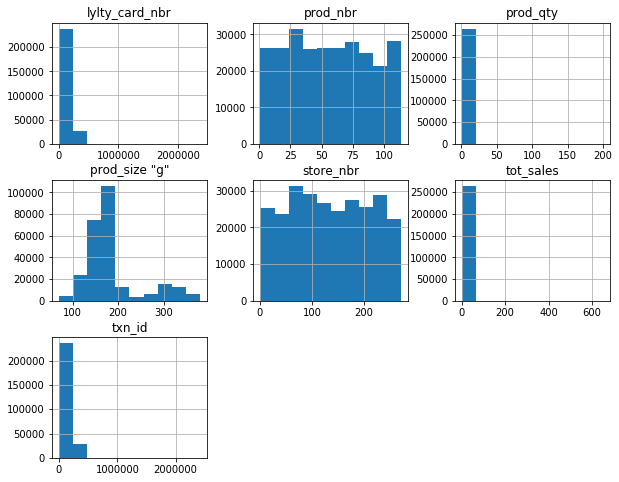

In [21]:
comb.hist(figsize=(10,8));

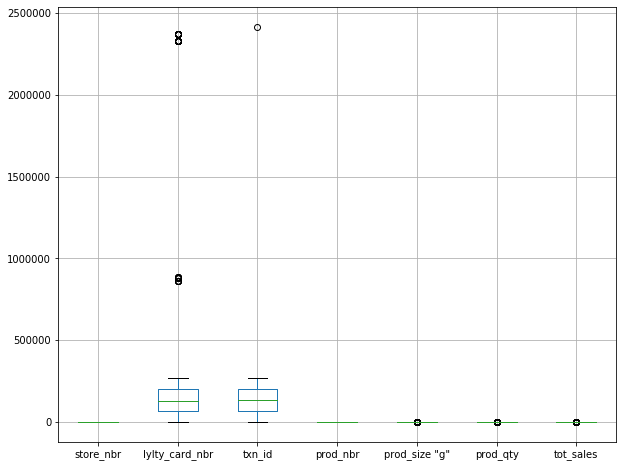

In [22]:
comb.boxplot(figsize=(10,8))

As displayed in the boxplot there are some outlier and these needs to be removed so that the accuracy of this analysis will affetced. We will analyze each column closely starting with 'lylty_card_nbr' and 'txn_id' columns. 

In [23]:
lyl_outlier = comb[(comb['lylty_card_nbr']) > 500000]
len(lyl_outlier)

44

In [24]:
comb.drop(comb[comb['lylty_card_nbr'] > 500000].index, inplace=True)

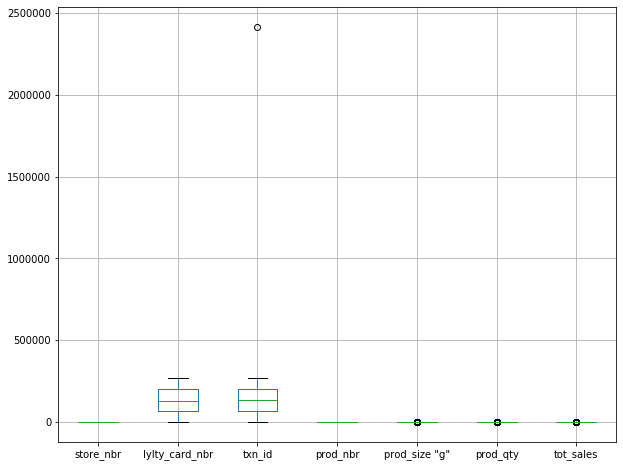

In [25]:
comb.boxplot(figsize=(10,8))

In [26]:
comb.drop(comb[comb['txn_id'] > 500000].index, inplace=True)

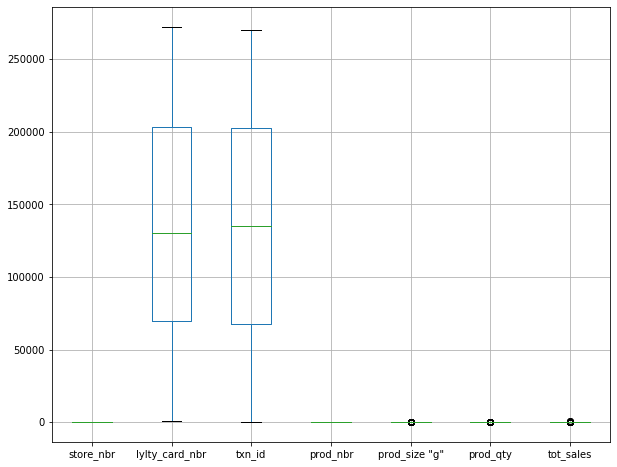

In [27]:
comb.boxplot(figsize=(10,8))

After taking out outliers in lylty_card_nbr and txn_id we still have some outliers let take a closer look at store_nbr, prod_nbr, prod_qty and tot_sales.

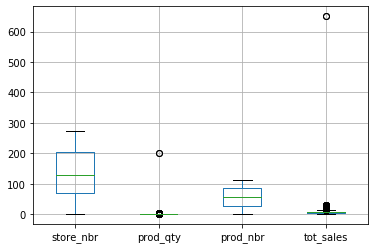

In [28]:
comb.boxplot(column=['store_nbr', 'prod_qty', 'prod_nbr', 'tot_sales'])

In [29]:
comb[comb['tot_sales'] > 600]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales,lifestage,premium_customer
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,380,200,650.0,OLDER FAMILIES,Premium
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,380,200,650.0,OLDER FAMILIES,Premium


In [30]:
comb[comb['prod_qty'] == 200]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,"prod_size ""g""",prod_qty,tot_sales,lifestage,premium_customer
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,380,200,650.0,OLDER FAMILIES,Premium
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,380,200,650.0,OLDER FAMILIES,Premium


The above records is a case of one tax id being assigned to an individual. I do not think an individual with a particular loyalty card number will have two different tax id. Only one tax id are usually assigned to a particular individual. In this case since the outlier for the 'prod_qty' and 'tot_sales' columns are from the same record i.e the record causing the outlier in 'prod_qty' and 'tot_sales' columns. We will delete both occurences of the observation and since its just two records our analysis accuracy will not be impacted by the deletion. More so since tax id is not one of the metrics to be used in the RFM analysis. 

In [31]:
# Deleting observations based on index number
comb = comb.drop([71456, 71457])

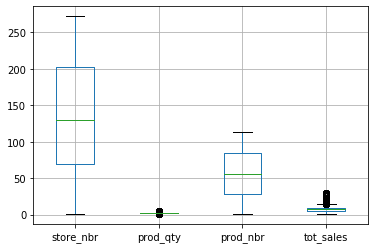

In [32]:
comb.boxplot(column=['store_nbr', 'prod_qty', 'prod_nbr', 'tot_sales'])

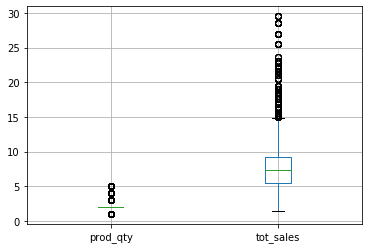

In [33]:
comb.boxplot(column=['prod_qty', 'tot_sales'])

We are left with 'prod_qty' and 'tot_sales'. I think these can be allowed to pass as obviously total sales per day and the quantity of products sold per day will vary.